In [17]:
import pandas as pd
df = pd.read_csv('../temp-data/chexpert-respirator.csv')
df

,stay_id,o2prior,sofa,resp,po2,sex,age,o2post,respirator,atelectasis,...,enlarged_cardiomediastinum,fracture,lung_lesion,lung_opacity,no_finding,pleural_effusion,pleural_other,pneumonia,pneumothorax,support_devices
0,30000646,96.166667,2,17.666667,71.0,1,43,96.500000,0,0,...,0,0,0,1,0,0,0,0,0,1
1,30001336,97.000000,1,26.666667,71.0,1,77,96.000000,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
2,30001396,87.666667,2,25.666667,76.0,1,40,80.666667,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
3,30001446,99.333333,11,19.666667,98.0,1,56,99.000000,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
4,30001471,94.000000,1,15.666667,98.0,1,86,92.166667,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55338,39999286,94.166667,4,17.333333,60.0,1,53,96.333333,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
55339,39999301,93.666667,4,15.333333,76.0,1,77,95.000000,1,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
55340,39999384,97.833333,2,22.000000,320.0,0,81,96.333333,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
55341,39999562,92.000000,1,18.000000,320.0,1,69,92.833333,0,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [19]:
# atelectasis,cardiomegaly,consolidation,edema,enlarged_cardiomediastinum,fracture,lung_lesion,lung_opacity,no_finding,pleural_effusion,pleural_other,pneumonia,pneumothorax,support_devices
X = df[['atelectasis', 'cardiomegaly', 'consolidation', 'edema', 'enlarged_cardiomediastinum', 'fracture', 'lung_lesion', 'lung_opacity', 'no_finding', 'pleural_effusion', 'pleural_other', 'pneumonia', 'pneumothorax', 'support_devices']]
y = df['respirator']

Accuracy: 0.8666546210136417
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      9592
           1       0.60      0.00      0.00      1477

    accuracy                           0.87     11069
   macro avg       0.73      0.50      0.47     11069
weighted avg       0.83      0.87      0.81     11069

Confusion Matrix:
 [[9590    2]
 [1474    3]]


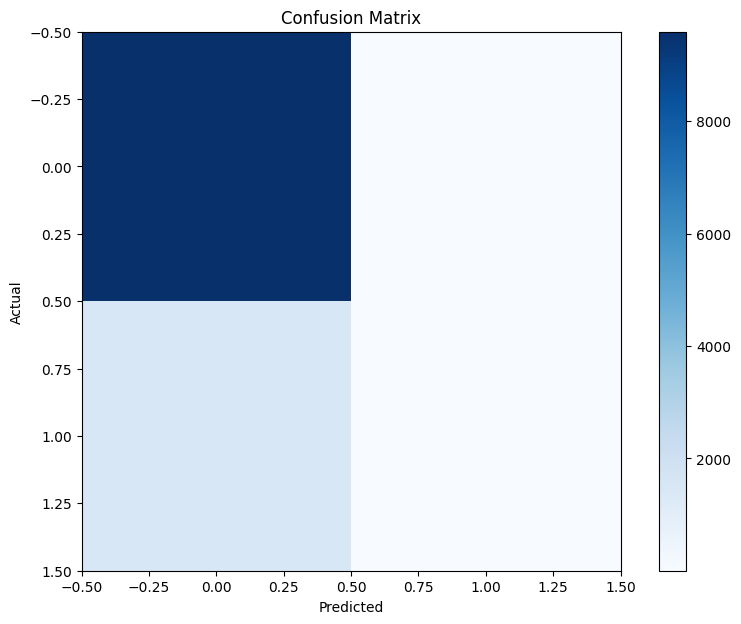

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# for every data point in X print correlation with y - note that this is the whole dataset 
correlation = X.corrwith(y)
print("Correlation with y:\n", correlation)

Correlation with y:
 atelectasis                   0.120601
cardiomegaly                  0.117327
consolidation                 0.122832
edema                         0.119698
enlarged_cardiomediastinum    0.118285
fracture                      0.118802
lung_lesion                   0.117574
lung_opacity                  0.125413
no_finding                    0.105800
pleural_effusion              0.121425
pleural_other                 0.119470
pneumonia                     0.117785
pneumothorax                  0.118784
support_devices               0.152848
dtype: float64


In [ ]:
# check if atelectasis != -2 has some correlation with y - this is the existence of x-ray information
x_ray = [1 if i != -2 else 0 for i in df['atelectasis']]
correlation = pd.Series(x_ray).corr(y)
print("Correlation with y (atelectasis != -2):", correlation)

Correlation with y (atelectasis != -2): 0.11993026970091482
